In [1]:
from rdkit import Chem
from rdkit.Chem import Descriptors, Draw
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_context('talk')
sns.set_style('darkgrid', {'axis.edgecolor': '0.2',
                           'xtick.bottom': True,
                           'ytick.bottom': True,
                          })
%matplotlib inline

In [2]:
def get_num_atoms(smi):
    mol = Chem.MolFromSmiles(smi)
    return mol.GetNumAtoms()

In [3]:
def get_MW(smi):
    mol = Chem.MolFromSmiles(smi)
    return Descriptors.MolWt(mol)

In [4]:
df_train = pd.read_csv('pred_models/rf_logSolubility_preds.csv')
df_train['num_atoms'] = df_train.SMILES.apply(get_num_atoms)
df_train['molecular_weight'] = df_train.SMILES.apply(get_MW)
df_train

,SMILES,split,logSolubility_true,logSolubility_pred,num_atoms,molecular_weight
0,COc1ccc2ccc(=O)oc2c1CC=C(C)C,train,-4.314,-4.034645,18,244.290
1,COc1ncc2nccnc2n1,train,-1.110,-1.132740,12,162.152
2,CC1CC2C3CC(F)C4=CC(=O)C=CC4(C)C3(F)C(O)CC2(C)C...,train,-5.613,-4.804600,29,410.457
3,CC(=O)SC1CC2=CC(=O)CCC2(C)C2CCC3(C)C(CCC34CCC(...,train,-4.173,-4.440320,29,416.583
4,Cc1cccc2c1Cc1ccccc1-2,train,-5.220,-5.261620,14,180.250
...,...,...,...,...,...,...
1049,CC(=O)OCC(=O)C1(O)C(C)CC2C3CCC4=CC(=O)C=CC4(C)...,test,-4.900,-4.382020,31,434.504
1050,CCCCCOC(C)=O,test,-1.890,-1.701103,9,130.187
1051,CCCc1ccccc1,test,-3.370,-3.054876,9,120.195
1052,O=C(Nc1ccccc1)c1ccccc1O,test,-3.590,-3.119900,16,213.236


In [5]:
df_gen = pd.read_csv('gen_model/generated_smiles_prior.csv')
df_gen['num_atoms'] = df_gen.SMILES.apply(get_num_atoms)
df_gen['molecular_weight'] = df_gen.SMILES.apply(get_MW)
df_gen

,SMILES,inchi_key,rf_logSolubility,num_atoms,molecular_weight
0,Clc1cc(Cl)cc(I)c1,AATPRMRVLQZEHB-UHFFFAOYSA-N,-4.432102,9,272.900
1,CCCC=C(C)CC,AAUHUDBDDBJONC-UHFFFAOYSA-N,-3.708100,8,112.216
2,CCCCOc1cccc(C(C)C(C)(C)O)c1,AAVJMXRDPCEDSV-UHFFFAOYSA-N,-3.561925,17,236.355
3,CSC(=O)Oc1cccnc1Cl,ABFBLZULOARXAE-UHFFFAOYSA-N,-2.130340,12,203.650
4,Cc1nc(S)cc(NC(C)(C)C)n1,ACSXRPCFDZVYEZ-UHFFFAOYSA-N,-2.208133,13,197.307
...,...,...,...,...,...
1029,CC(C)CO,ZXEKIIBDNHEJCQ-UHFFFAOYSA-N,0.008821,5,74.123
1030,CCCCCCOCC,ZXHQLEQLZPJIFG-UHFFFAOYSA-N,-3.100933,9,130.231
1031,CCC(C)C(C)O,ZXNBBWHRUSXUFZ-UHFFFAOYSA-N,-0.749100,7,102.177
1032,CCCNc1cccc(NC(O)CC)c1,ZZAQZEMENKZJPN-UHFFFAOYSA-N,-3.065934,15,208.305


In [6]:
sns.set_style('darkgrid', {'axis.edgecolor': 'black',
                           'axes.linewidth': 2,
                           'xtick.bottom': True,
                           'ytick.bottom': True,
                          })

Visually confirm that the generated molecules are sampled from the same distribution as the training set

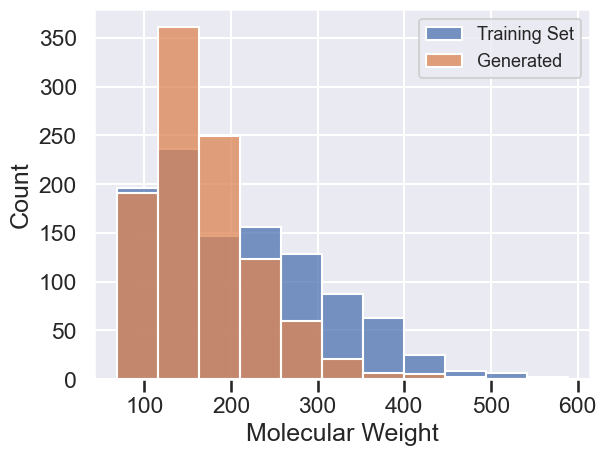

In [7]:
target = 'molecular_weight'
bins = np.histogram_bin_edges(df_train[target], bins=11)
ax = sns.histplot(x=df_train[target], bins=bins, label='Training Set')
ax = sns.histplot(x=df_gen[target], bins=bins, label='Generated')

ax.set_xlabel('Molecular Weight')
ax.set_ylabel('Count')
ax.legend(fontsize=13)
fig = ax.get_figure()

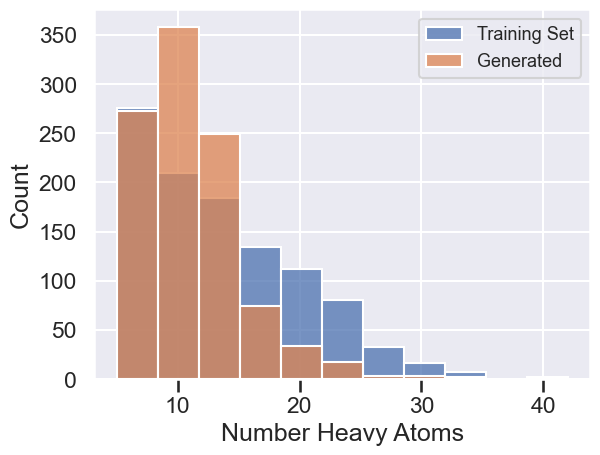

In [8]:
target = 'num_atoms'
bins = np.histogram_bin_edges(df_train[target], bins=11)
ax = sns.histplot(x=df_train[target], bins=bins, label='Training Set')
ax = sns.histplot(x=df_gen[target], bins=bins, label='Generated')

ax.set_xlabel('Number Heavy Atoms')
ax.set_ylabel('Count')
ax.legend(fontsize=13)
fig = ax.get_figure()

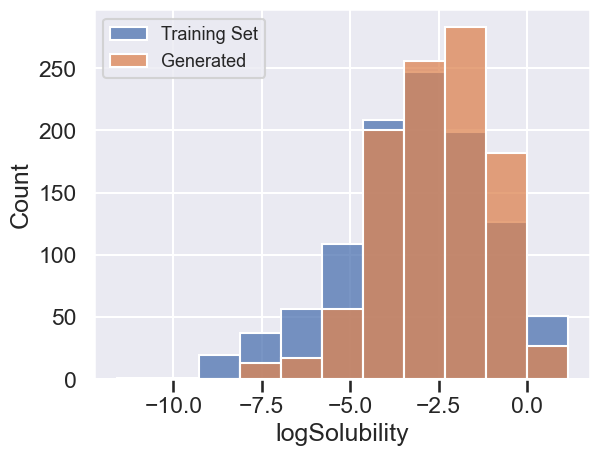

In [9]:
bins = np.histogram_bin_edges(df_train['logSolubility_true'], bins=11)
ax = sns.histplot(x=df_train['logSolubility_true'], bins=bins, label='Training Set')
ax = sns.histplot(x=df_gen['rf_logSolubility'], bins=bins, label='Generated')

ax.set_xlabel('logSolubility')
ax.set_ylabel('Count')
ax.legend(fontsize=13)
fig = ax.get_figure()

In [10]:
df_train.describe()

,logSolubility_true,logSolubility_pred,num_atoms,molecular_weight
count,1054.000000,1054.000000,1054.000000,1054.000000
mean,-3.175521,-3.170723,13.759962,209.317501
std,2.067534,1.915227,6.435469,98.190563
min,-11.600000,-10.422950,5.000000,68.075000
25%,-4.408250,-4.246647,8.000000,128.160500
50%,-3.040000,-3.023347,12.000000,191.728000
75%,-1.782500,-1.856744,18.000000,278.352500
max,1.144000,0.890822,42.000000,588.562000


In [11]:
df_gen.describe()

,rf_logSolubility,num_atoms,molecular_weight
count,1034.000000,1034.000000,1034.000000
mean,-2.559008,11.037718,167.753721
std,1.564341,4.310272,66.727176
min,-8.077680,1.000000,16.043000
25%,-3.641383,8.000000,123.155000
50%,-2.414588,10.000000,156.291000
75%,-1.387924,13.000000,199.036000
max,0.598810,42.000000,656.611000


In [12]:
df_train['inchi_key'] = df_train.SMILES.apply(lambda smi: Chem.inchi.MolToInchiKey(Chem.MolFromSmiles(smi)))

In [13]:
df_gen[df_gen.inchi_key.isin(df_train.inchi_key.values)]

,SMILES,inchi_key,rf_logSolubility,num_atoms,molecular_weight
9,CCCC(C)C,AFABGHUZZDYHJO-UHFFFAOYSA-N,-3.492246,6,86.178
10,CNc1ccccc1,AFBPFSWMIHJQDM-UHFFFAOYSA-N,-1.234717,8,107.156
19,CCCCCO,AMQJEAYHLZJPGS-UHFFFAOYSA-N,-0.466300,6,88.150
25,CCC(O)CC,AQIXEPGDORPWBJ-UHFFFAOYSA-N,-0.302000,6,88.150
29,CC(C)COC=O,AVMSWPWPYJVYKY-UHFFFAOYSA-N,-0.958271,7,102.133
...,...,...,...,...,...
1018,CCCCCCO,ZSIAUFGUXNUGDI-UHFFFAOYSA-N,-1.189333,7,102.177
1020,CCCC=O,ZTQSAGDEMFDKMZ-UHFFFAOYSA-N,-0.179712,5,72.107
1025,CCC(C)=O,ZWEHNKRNPOVVGH-UHFFFAOYSA-N,0.353181,5,72.107
1027,CCCCCCCCCO,ZWRUINPWMLAQRD-UHFFFAOYSA-N,-3.112027,10,144.258


In [14]:
df_non_overlap = df_gen[~df_gen.inchi_key.isin(df_train.inchi_key.values)]
df_non_overlap

,SMILES,inchi_key,rf_logSolubility,num_atoms,molecular_weight
0,Clc1cc(Cl)cc(I)c1,AATPRMRVLQZEHB-UHFFFAOYSA-N,-4.432102,9,272.900
1,CCCC=C(C)CC,AAUHUDBDDBJONC-UHFFFAOYSA-N,-3.708100,8,112.216
2,CCCCOc1cccc(C(C)C(C)(C)O)c1,AAVJMXRDPCEDSV-UHFFFAOYSA-N,-3.561925,17,236.355
3,CSC(=O)Oc1cccnc1Cl,ABFBLZULOARXAE-UHFFFAOYSA-N,-2.130340,12,203.650
4,Cc1nc(S)cc(NC(C)(C)C)n1,ACSXRPCFDZVYEZ-UHFFFAOYSA-N,-2.208133,13,197.307
...,...,...,...,...,...
1028,CC(=CCl)CCl,ZWZWQSKCVXIXQJ-UHFFFAOYSA-N,-2.416503,6,124.998
1030,CCCCCCOCC,ZXHQLEQLZPJIFG-UHFFFAOYSA-N,-3.100933,9,130.231
1031,CCC(C)C(C)O,ZXNBBWHRUSXUFZ-UHFFFAOYSA-N,-0.749100,7,102.177
1032,CCCNc1cccc(NC(O)CC)c1,ZZAQZEMENKZJPN-UHFFFAOYSA-N,-3.065934,15,208.305


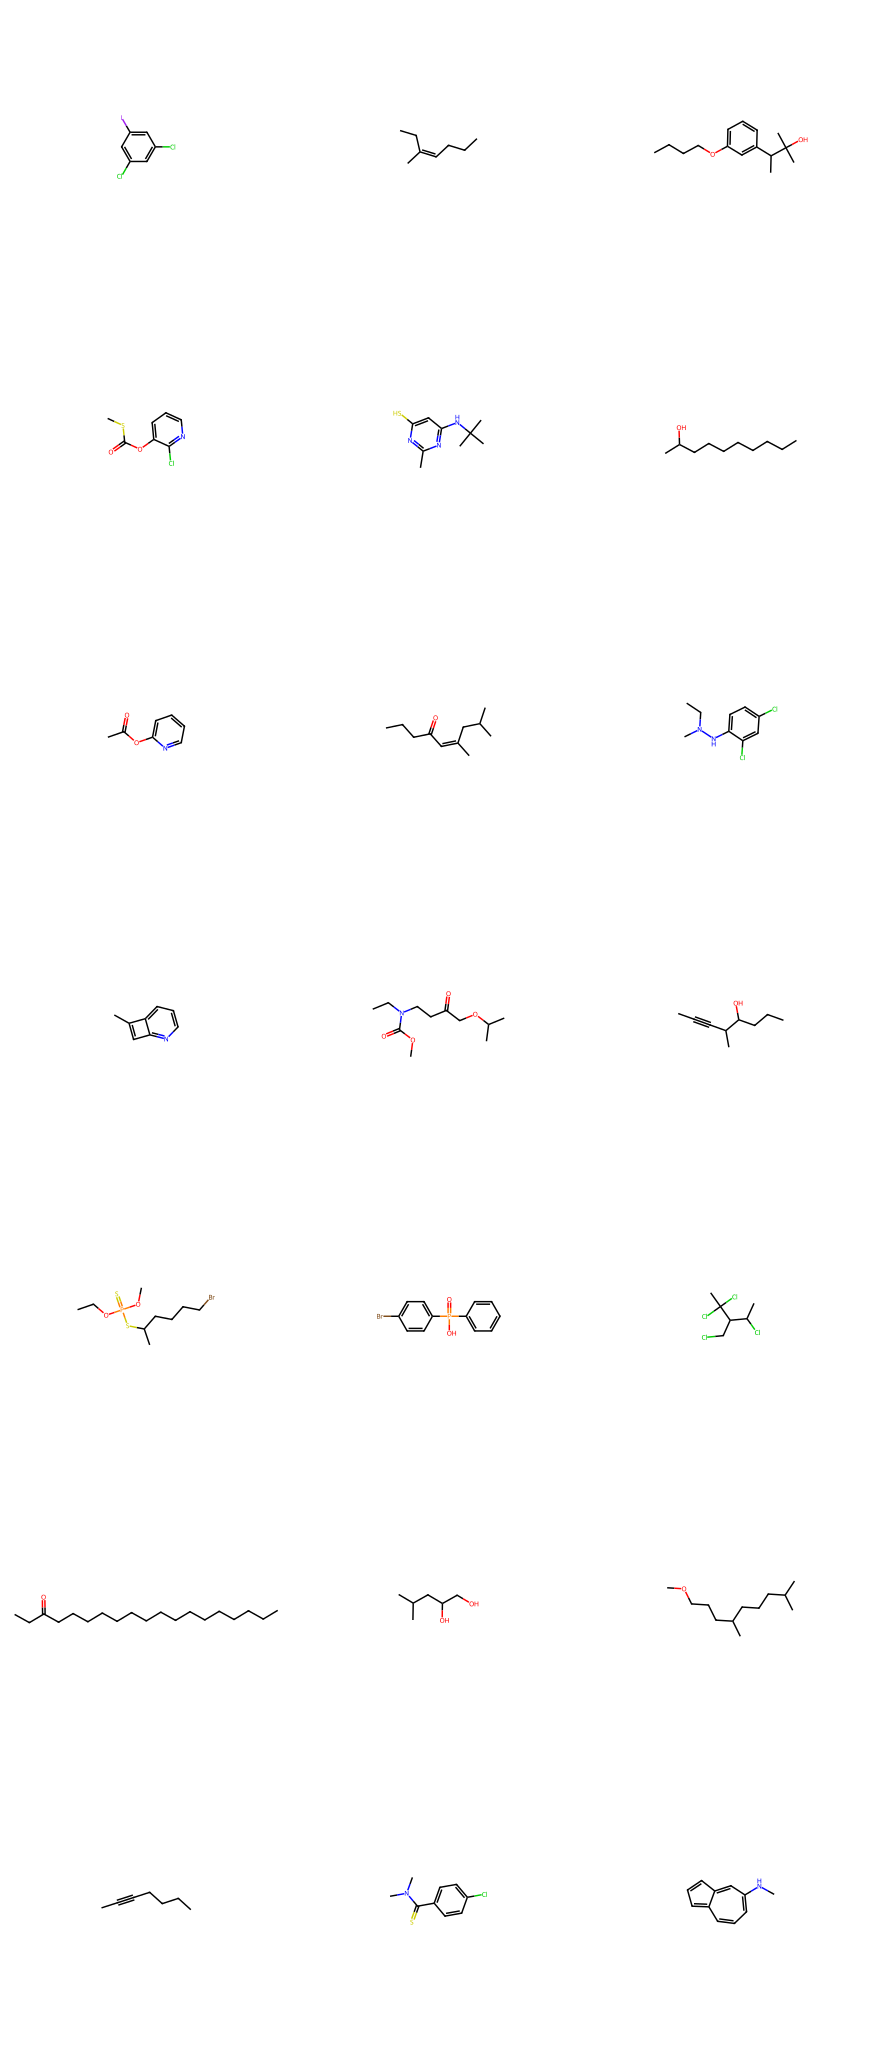

In [15]:
# inspect some of the generated molecule
size = 400
img = Draw.MolsToGridImage([Chem.MolFromSmiles(x) for x in df_non_overlap.SMILES.values[:21]], subImgSize=(size, size), useSVG=True)
img

In [ ]:
# with open('gen_model/sample_generated_smiles_prior.svg', 'w') as f:
#     f.write(img.data)